# Primeiros passos com aprendizagem de máquina

*Objetvo*: Treinar um modelo capaz de estimar qual será a nota de um filme no IMDB (https://www.imdb.com/).

In [471]:
import pandas as pd
import matplotlib.pyplot as plt

# tratamento de dados
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# métodos de regressão
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

# métricas de erro
from sklearn.metrics import mean_absolute_error

In [472]:
df = pd.read_csv('../input/imdb-5000-movie-dataset/movie_metadata.csv')
df.shape

(5043, 28)

In [473]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [474]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [475]:
df2 = df.drop(["actor_1_name", "actor_2_name", "actor_3_name", "genres", "movie_title", "plot_keywords", "movie_imdb_link", "language", "country", "director_name"], axis=1)
df2 = pd.get_dummies(df2, columns=["content_rating", "color"], drop_first=True)
df2.shape

(5043, 34)

## Análise: distribuição das notas do IMDB

(array([  16.,   38.,  102.,  222.,  579., 1158., 1515., 1085.,  307.,
          21.]),
 array([1.6 , 2.39, 3.18, 3.97, 4.76, 5.55, 6.34, 7.13, 7.92, 8.71, 9.5 ]),
 <a list of 10 Patch objects>)

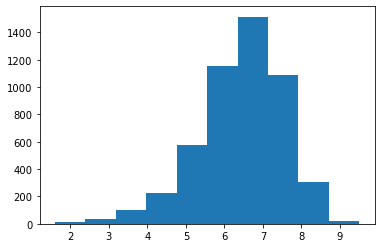

In [476]:
plt.hist(df["imdb_score"])

## Análise: Budget vs IMDB

Text(0, 0.5, 'IMDB')

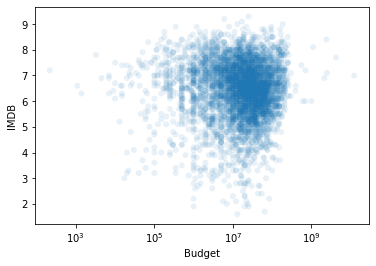

In [477]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df["budget"], df["imdb_score"], alpha=0.1, edgecolors='none')
ax.set_xscale('log')
plt.xlabel("Budget")
plt.ylabel("IMDB")

## Separação em treinamento e teste

In [478]:
y = df2["imdb_score"]
X = df2.drop("imdb_score", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)
print(y_train.shape, y_test.shape)

(3530,) (1513,)


## Treinamento

Utilizaremos o conjunto reservado ao treinamento para ajustar o modelo. Idealmente, utilizaríamos validação cruzada para poder otimizar os parâmetros do modelo, mas por simplicidade será realizado um treinamento simplificado.

In [479]:
reg = make_pipeline(SimpleImputer(strategy="most_frequent"), StandardScaler(), RandomForestRegressor(n_estimators=200, random_state=10))
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)

print('Erro médio absoluto: ', mean_absolute_error(y_train, y_train_pred))

Erro médio absoluto:  0.21289220963172814


## Teste

Para estimar o desempenho do modelo no mundo real, utilizaremos o conjunto de dados que foi reservado para teste.

Text(0, 0.5, 'IMDB (predição)')

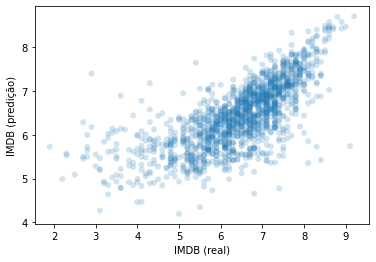

In [480]:
y_test_pred = reg.predict(X_test)
plt.scatter(y_test, y_test_pred, alpha=0.2, edgecolors='none')
plt.xlabel("IMDB (real)")
plt.ylabel("IMDB (predição)")

Erro médio absoluto:  0.5708483146067413


Text(0, 0.5, 'Quantidade')

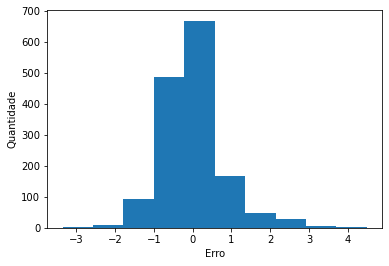

In [481]:
print('Erro médio absoluto: ', mean_absolute_error(y_test, y_test_pred))
err = y_test_pred - y_test

plt.hist(err)
plt.xlabel("Erro")
plt.ylabel("Quantidade")

## Últimos passos

Para aplicar este modelo a casos reais, teríamos que salvar o modelo treinado (o pipeline completo) para um arquivo, para poder ser usado em outros programas.
No uso, os dados precisariam ser ajustados da mesma forma como foram aqui (no caso, removendo as colunas categóricas), sendo alimentados ao modelo pelo método _predict_.